In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
original_train = pd.read_csv('../archive/fashion-mnist_train.csv')
aug_original_train = pd.read_csv('../archive/aug_fashion-mnist_train2.csv')
# aug_original_train = pd.read_csv('./shuffled_file.csv')
original_test = pd.read_csv('../archive/fashion-mnist_test.csv')
public_test = pd.read_csv('../archive/fashion-mnist_public_test.csv')
private_test1 = pd.read_csv('../archive/fashion-mnist_private_test1.csv')
private_test2 = pd.read_csv('../archive/fashion-mnist_private_test2.csv')

original_train_data = original_train.drop('label', axis=1)
aug_original_train_data = aug_original_train.drop('label', axis=1)
original_test_data = original_test.drop('label', axis=1)
public_test_data = public_test.drop('label', axis=1)
private_test1_data = private_test1.drop('label', axis=1)
private_test2_data = private_test2.drop('label', axis=1)

original_train_labels = original_train['label']
aug_original_train_labels = aug_original_train['label']
original_test_labels = original_test['label']
public_test_labels = public_test['label']

# original_train /= 255
# private_test /= 255
# original_test /= 255

data_set_list = [original_train_data, aug_original_train_data, original_test_data, public_test_data, private_test1_data, private_test2_data]
label_set = [original_train_labels, aug_original_train_labels, original_test_labels, public_test_labels]
data_set_name = ['original_train', 'aug_original_train', 'original_test', 'public_test','private_test1', 'private_test2']

# 픽셀 위치 분포

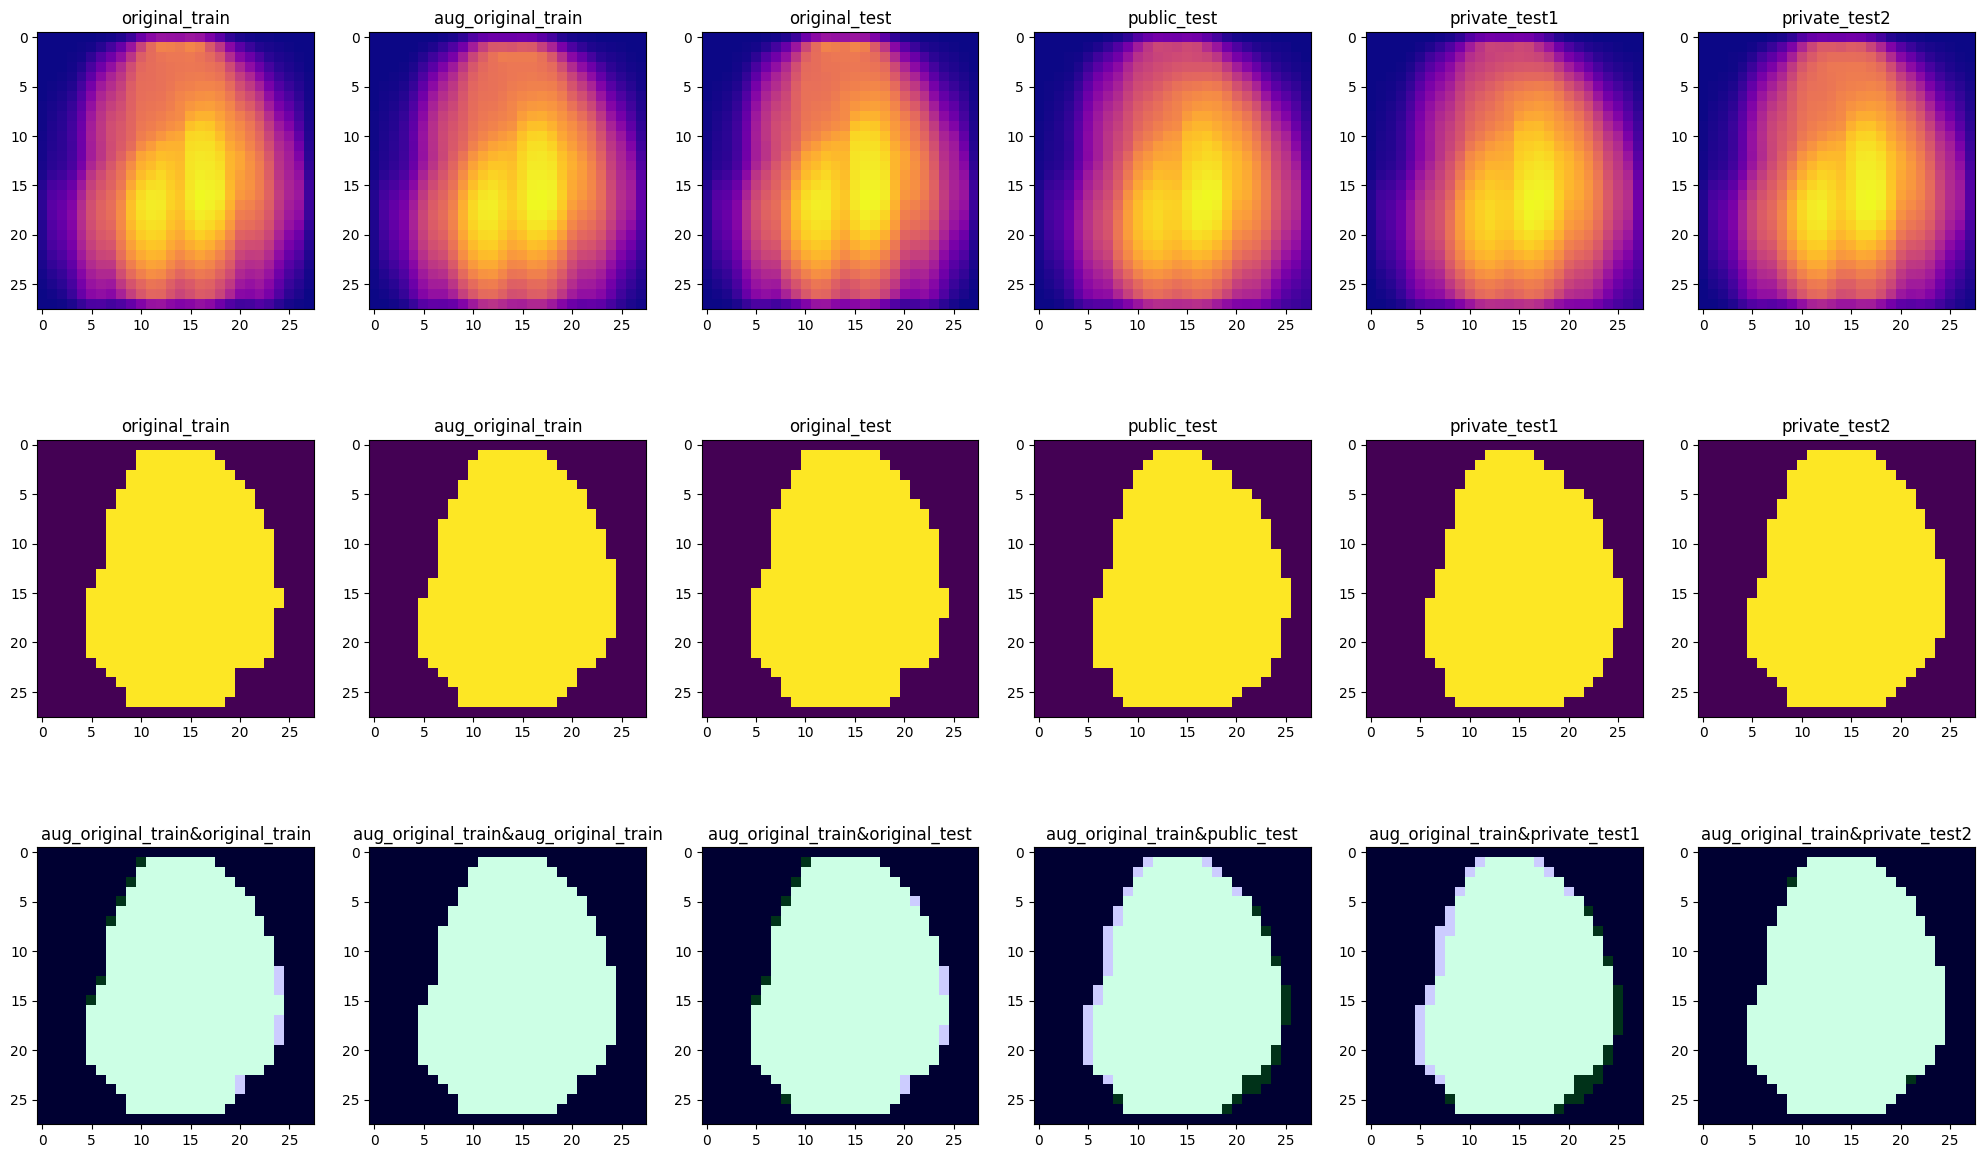

In [3]:
row = 3
fig = plt.figure(figsize = (25,5*row))

p = 1
mean_vector_list = []
for data in data_set_list :
    mean_vector = np.zeros(784)
    
    for image in data.iloc :
        mean_vector += image
        
    mean_vector = mean_vector / len(data)
    mean_vector = mean_vector.values.reshape(28,28)
    
    ax = fig.add_subplot(row,len(data_set_list),p)
    ax.set_title(data_set_name[p-1])
    ax.imshow(mean_vector, cmap='plasma')
    p += 1
    
    mean_vector_list.append(mean_vector)
    
name = 0
image_list = []
for mean_vector in mean_vector_list :
    image = mean_vector > mean_vector.mean()
    ax = fig.add_subplot(row,len(data_set_list),p)
    ax.set_title(data_set_name[name])
    ax.imshow(image)
    name+=1
    p+=1 
    image_list.append(image)

layer = 1 # 0 : original_train, 1 : aug_original_train
for idx in range(len(image_list)):
    ax = fig.add_subplot(row,len(data_set_list),p)
    ax.imshow(image_list[layer], cmap='gray')
    ax.imshow(image_list[idx], alpha=0.2, cmap='winter')
    ax.set_title(data_set_name[layer]+ '&' + data_set_name[idx])
    p += 1
    
plt.show()

# 20s

# 클래스당 픽셀 분포

In [4]:
# data_set = [original_train_data, aug_original_train_data, original_test_data, public_test_data, private_test1_data, private_test2_data]
# label_set = [original_train_labels, aug_original_train_labels, original_test_labels, public_test_labels]

from collections import Counter
from tqdm import tqdm

image_per_class = 6000

num = 2
data_set1_idx = 0
data_set2_idx = 3

# train = pd.read_csv('../archive/fashion-mnist_train.csv')
# train_labels = train['label']
# train_data = train.drop('label', axis=1)

data_set1 = data_set_list[data_set1_idx]
data_set2 = data_set_list[data_set2_idx]

data_labels1 = label_set[data_set1_idx]
data_labels2 = label_set[data_set2_idx]

data_set1_image_list = np.zeros((10, 784))
data_set2_image_list = np.zeros((10, 784))

for idx, image in tqdm(enumerate(data_set1.iloc)):
    data_set1_image_list[data_labels1[idx]] += (image/image_per_class)
    
for idx, image in tqdm(enumerate(data_set2.iloc)):
    data_set2_image_list[data_labels2[idx]] += (image/image_per_class)
    
# image_list.shape = (10, 6000, 28, 28)

0it [00:00, ?it/s]

60000it [00:13, 4387.04it/s]
5000it [00:01, 4250.29it/s]


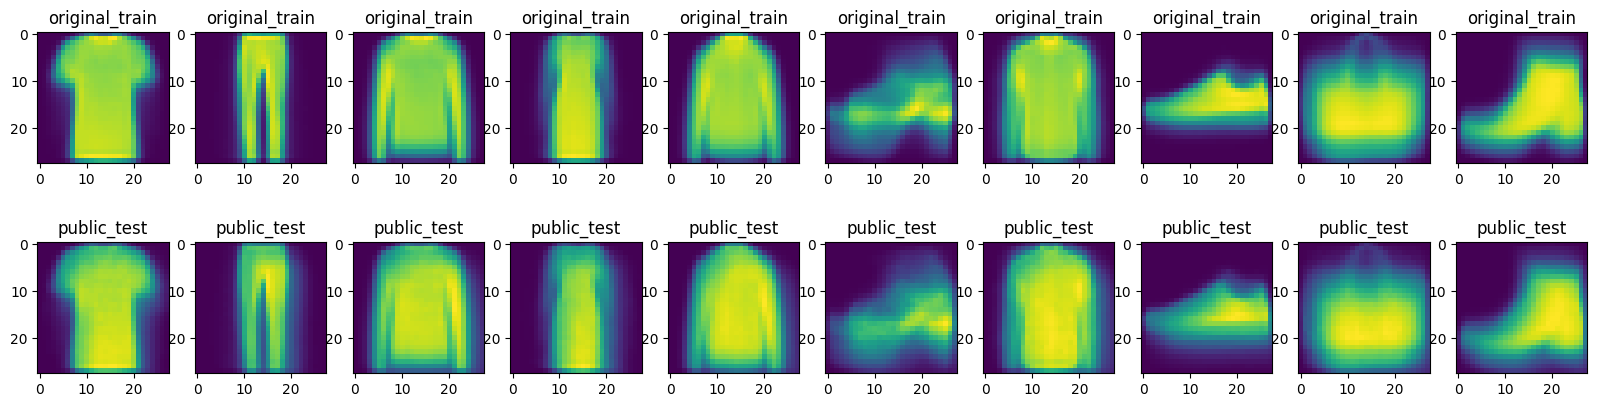

In [5]:
row = 2
fig = plt.figure(figsize=(10*row,5))

p = 1
for class_image in data_set1_image_list :
    ax = fig.add_subplot(row, 10, p)
    image = class_image.reshape(28, 28)
    ax.imshow(image)
    ax.set_title(data_set_name[data_set1_idx])
    p += 1
    
for class_image in data_set2_image_list :
    ax = fig.add_subplot(row, 10, p)
    image = class_image.reshape(28, 28)
    ax.imshow(image)
    ax.set_title(data_set_name[data_set2_idx])
    p += 1

plt.show()

# 픽셀값 분포

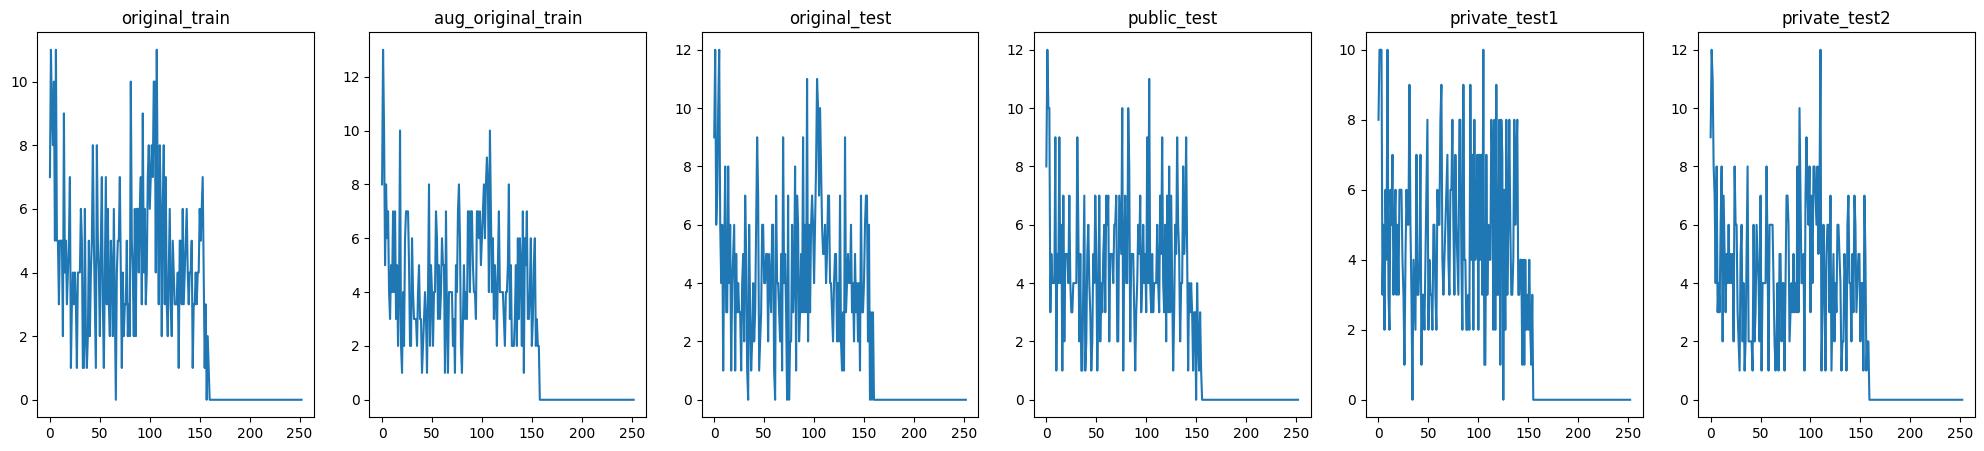

In [10]:
fig = plt.figure(figsize = (25,5))
p = 1
for data in data_set_list :
    mean_vector = np.zeros(784)
    for image in data.iloc :
        mean_vector += image
        
    mean_vector = round(mean_vector / len(data))
    mean_vector = mean_vector.values.reshape(28,28).astype(np.uint8)
    
    histogram = cv2.calcHist([mean_vector], [0], None, [253], [3, 256])
    ax = fig.add_subplot(1,len(data_set_list),p)
    ax.set_title(data_set_name[p-1])
    ax.plot(histogram)
    p+=1
    
plt.show()